The main challange of the Linear Regression is to minimise the cost function. that is to find the parameters that are well sutable to minimise the cost function

the Treditional mathematical way of solving this problem is with Normal Equaltion

# Normal Equation

$\hat{\theta} = {(}{X}^{T}{X}{)}^{-1}{X}^{T}{Y}$

lets try solving this

In [1]:
#genarate some linear data to solve this
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

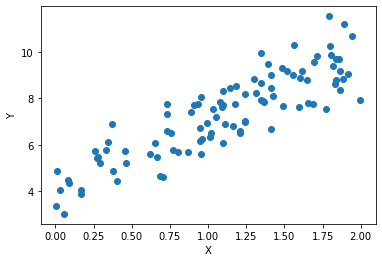

In [2]:
plt.scatter(X, y,)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

we will be using the inv() for inverse and dot() for matrix multiplication

In [3]:
X_b = np.c_[np.ones((100, 1)), X]

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.15834119],
       [2.87662956]])

lets make pridictions using the theta

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [7]:
y_predict = X_new_b.dot(theta_best)

In [8]:
y_predict

array([[4.15834119],
       [9.91160032]])

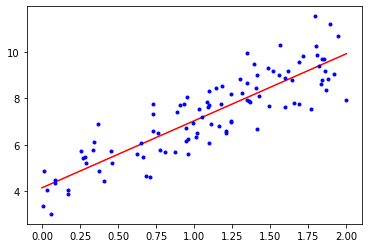

In [9]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.show()

Above is the soolution with the Normal equation, but the issue with normal equation is that we have to use inv() from numpy module, it will work fast if data is small but as the features increse the completxity increses thus lead to slow progress

one of the solutions to above problem is to use Scikit-learn Linear Regression which will use "scipy.linalg.lstsq()" which is "least squares"

which uses the Singular value decomposition(SVD) and computes the Sudo-inverse of the function that is ${\theta} = {X}^{+}{y}$

Lets try with Scikit-learn Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.coef_, lin_reg.intercept_

(array([[2.87662956]]), array([4.15834119]))

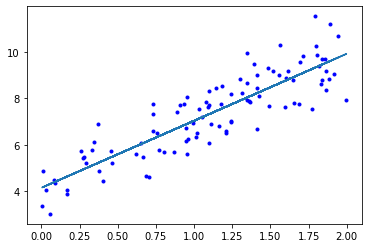

In [12]:
plt.plot(X, y, "b.")
y_plot = (lin_reg.coef_)*X+lin_reg.intercept_
plt.plot(X,y_plot)
plt.show()

In [13]:
lin_reg.predict(X_new)

array([[4.15834119],
       [9.91160032]])

One more and best method for the Opimization is Gradient Descent Algorithem

# Gradient Descent

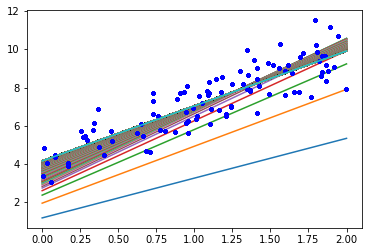

In [14]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    y_pred_grad = X_new_b.dot(theta)
    plt.plot(X, y, 'b.')
    plt.plot(X_new, y_pred_grad)
    

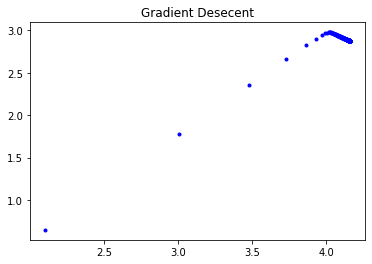

In [30]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    y_pred_grad = X_new_b.dot(theta)
    plt.plot(theta[0][0], theta[1][0], 'b.')
plt.title('Gradient Desecent')
plt.show()

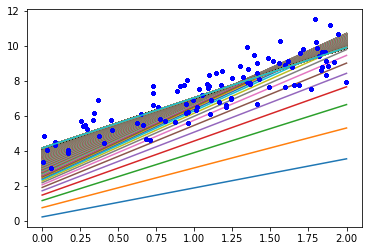

In [15]:
#with eta as 0.05
eta = 0.05
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    y_pred_grad = X_new_b.dot(theta)
    plt.plot(X, y, 'b.')
    plt.plot(X_new, y_pred_grad)

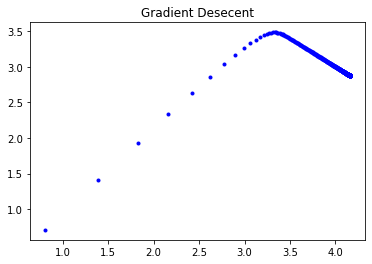

In [33]:
eta = 0.05
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    y_pred_grad = X_new_b.dot(theta)
    plt.plot(theta[0][0], theta[1][0], 'b.')
plt.title('Gradient Desecent')
plt.show()

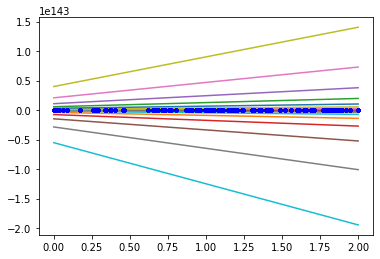

In [16]:
#with eta as 5
eta = 0.5
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    y_pred_grad = X_new_b.dot(theta)
    plt.plot(X, y, 'b.')
    plt.plot(X_new, y_pred_grad)

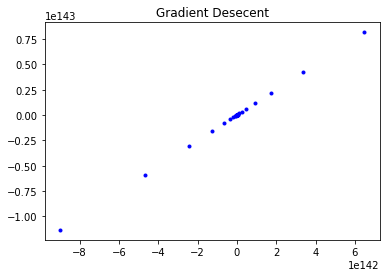

In [32]:
eta = 0.5
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    y_pred_grad = X_new_b.dot(theta)
    plt.plot(theta[0][0], theta[1][0], 'b.')
plt.title('Gradient Desecent')
plt.show()

In [17]:
theta

array([[-5.52990235e+142],
       [-6.97037992e+142]])

In [18]:
y_pred_grad = X_new_b.dot(theta)

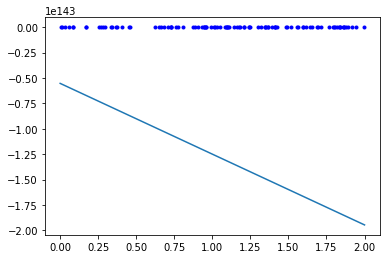

In [19]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred_grad)
plt.show()

change the eta as 0.02

# Stochastic Gradient Descent

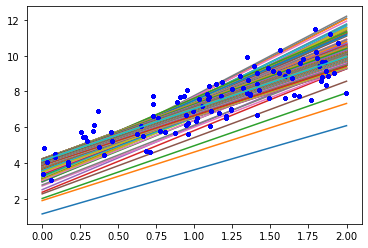

In [34]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi= X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m +i)
        theta = theta - eta *gradients
        y_pred_grad = X_new_b.dot(theta)
        plt.plot(X, y, 'b.')
        plt.plot(X_new, y_pred_grad)

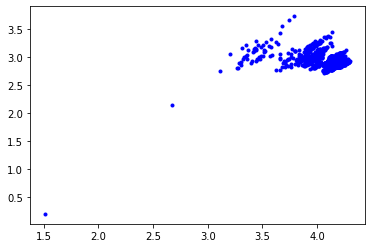

In [24]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi= X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m +i)
        theta = theta - eta *gradients
#         y_pred_grad = X_new_b.dot(theta)
#         plt.plot(X, y, 'b.')
#         plt.plot(X_new, y_pred_grad)
        plt.plot(theta[0][0], theta[1][0], 'b.')
plt.show()

we have observed some differnce in the theta values of the above algorithems and SGD this because, the SGD picks random instace in every step and compute the gradients with the single instance, so it is less regular and ends at a close point to minimum but not exactly at minimum. so its parameters are good but not optimal.

thats why we have used somethig called learning schedules which will decerese the learning rate at each epoch so that it we can lower the jumping of the gradients at the minimum and parameters will not escape the minimum point. this is called simulated annealing 

In [21]:
theta

array([[4.24354547],
       [2.86180106]])

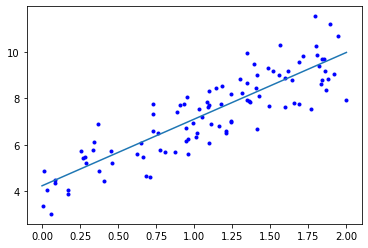

In [22]:
y_pred_grad = X_new_b.dot(theta)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred_grad)
plt.show()